In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [86]:
df=pd.read_csv('supply_chain_data.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [87]:
df.shape

(100, 24)

In [88]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [89]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [90]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

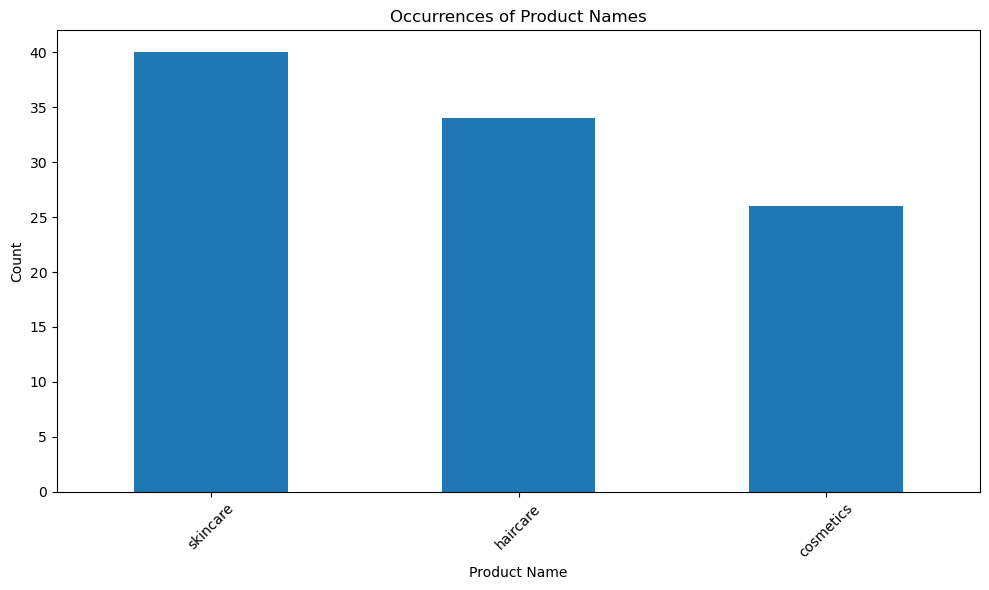

In [91]:
product_counts = df['Product type'].value_counts()

# Generate a bar plot
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.title('Occurrences of Product Names')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

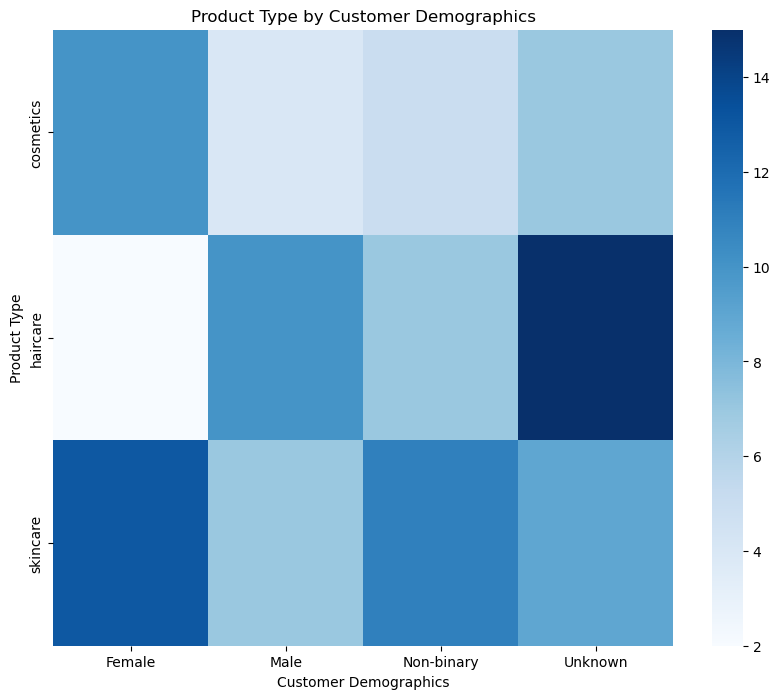

In [92]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(df['Product type'], df['Customer demographics']), cmap='Blues')
plt.xlabel('Customer Demographics')
plt.ylabel('Product Type')
plt.title('Product Type by Customer Demographics')
plt.show()

In [93]:
haircare = df[df['Product type']=='haircare']
##haircare.plot.line(x='Location', y='Price') doesnt give the expected result

<Axes: xlabel='Location', ylabel='Price'>

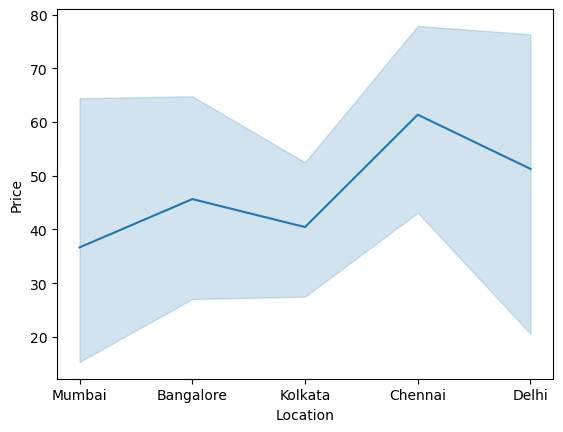

In [94]:
sns.lineplot(data=haircare, x="Location", y="Price")

<Axes: xlabel='Location', ylabel='Price'>

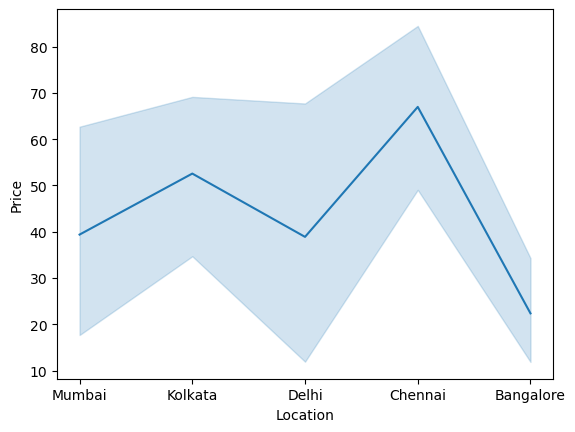

In [95]:
df_skincare = df[df['Product type']=='skincare']
sns.lineplot(data=df_skincare, x="Location", y="Price")

<Axes: xlabel='Location', ylabel='Price'>

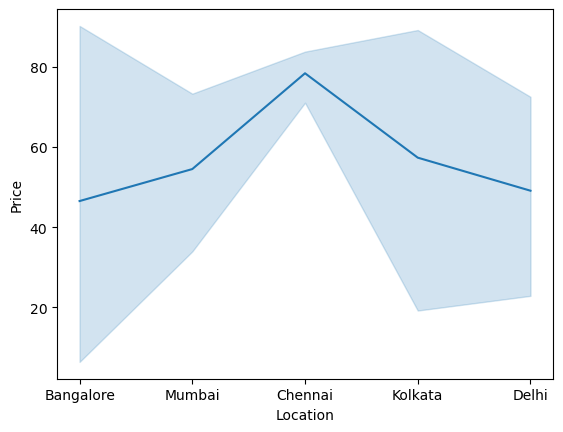

In [96]:
df_cosmetics = df[df['Product type']=='cosmetics']
sns.lineplot(data=df_cosmetics, x="Location", y="Price")

In [97]:
df_haircare = df[df['Product type']=='haircare'].sort_values(by=['Price'], ascending=False)
print(df_haircare['SKU'].head(10)) #sorted in desceding and prints the top 10 most selling products by their id


26    SKU26
84    SKU84
87    SKU87
55    SKU55
95    SKU95
48    SKU48
81    SKU81
12    SKU12
0      SKU0
93    SKU93
Name: SKU, dtype: object


In [98]:
df_cosmetics = df[df['Product type']=='cosmetics'].sort_values(by=['Price'], ascending=False)
print(df_cosmetics['SKU'].head(10)) #sorted in desceding and prints the top 10 most selling products by their id


89    SKU89
27    SKU27
72    SKU72
35    SKU35
21    SKU21
73    SKU73
17    SKU17
49    SKU49
85    SKU85
88    SKU88
Name: SKU, dtype: object


In [99]:
df_skincare = df[df['Product type']=='skincare'].sort_values(by=['Price'], ascending=False)
print(df_skincare['SKU'].head(10)) #sorted in desceding and prints the top 10 most selling products by their id


14    SKU14
41    SKU41
52    SKU52
20    SKU20
47    SKU47
75    SKU75
80    SKU80
11    SKU11
64    SKU64
67    SKU67
Name: SKU, dtype: object


<Axes: xlabel='Price', ylabel='Product type'>

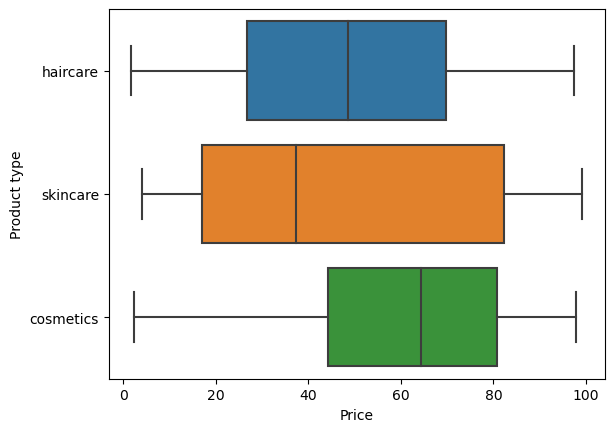

In [100]:
sns.boxplot(data=df, x="Price", y="Product type") #boxplot for price range

In [103]:
X = df[['Price', 'Availability', 'Number of products sold', 'Customer demographics',
        'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
        'Shipping costs', 'Lead time', 'Production volumes', 'Manufacturing lead time',
        'Manufacturing costs', 'Inspection results', 'Defect rates', 'Costs']]
y = df['Revenue generated']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

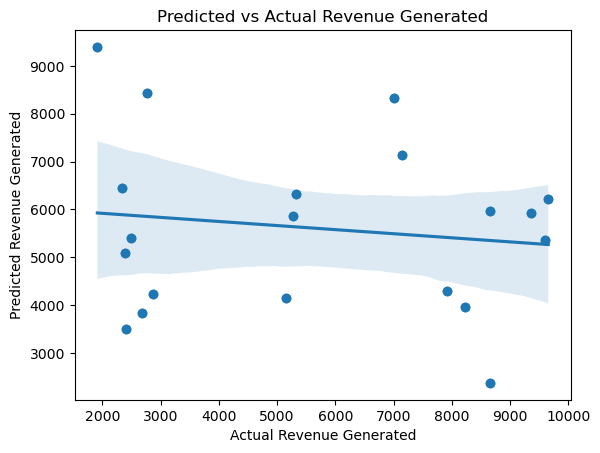

In [104]:
plt.scatter(y_test, y_pred)

# Plot a regression line to see how well the model has fit the data
sns.regplot(x=y_test, y=y_pred)

plt.xlabel('Actual Revenue Generated')
plt.ylabel('Predicted Revenue Generated')
plt.title('Predicted vs Actual Revenue Generated')
plt.show()